# How to: Scrape the Web
with Python + requests + BeautifulSoup

Before you replicate the following code, make sure you have Python and all dependencies installed.
- To install package manager brew:  
`/usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"`  
- To install Python3: `brew install python3`  
- To install Jupyter and use Notebooks: `pip3 install jupyter`  
- To install requests: `pip3 install requests`  
- To install BeautifulSoup: `pip3 install bs4`  

Documentation:  
- Python: https://www.python.org/doc/
- requests: http://docs.python-requests.org/en/master/  
- BeautifulSoup: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

### Import all the needed dependencies

In [1]:
import requests
from bs4 import BeautifulSoup

### Grab HTML source code

##### Send GET request

In [3]:
url = 'http://www.imfdb.org/wiki/Category:Movie'
headers = {
    'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Mobile Safari/537.36',
    'Connection' : 'keep-alive'
}

proxies = {
    # Include your proxies if needed
    # 'http':'...',
    # 'https':'...'
}

response = requests.get(url, headers=headers, proxies=proxies)
response

<Response [200]>

##### Save the response

In [4]:
text = response.text
text

'<!DOCTYPE html>\n<html lang="en" dir="ltr" class="client-nojs">\n<head>\n<title>Category:Movie - Internet Movie Firearms Database - Guns in Movies, TV and Video Games</title>\n<meta charset="UTF-8" />\n<meta name="generator" content="MediaWiki 1.19.1" />\n<script src="/cdn-cgi/apps/head/SEnd_iQWpRi1rDuyjVCSSAq6RVw.js"></script><link rel="shortcut icon" href="/favicon.ico" />\n<link rel="search" type="application/opensearchdescription+xml" href="/opensearch_desc.php" title="Internet Movie Firearms Database - Guns in Movies, TV and Video Games (en)" />\n<link rel="EditURI" type="application/rsd+xml" href="http://www.imfdb.org/api.php?action=rsd" />\n<link rel="alternate" type="application/atom+xml" title="Internet Movie Firearms Database - Guns in Movies, TV and Video Games Atom feed" href="/index.php?title=Special:RecentChanges&amp;feed=atom" />\n<link rel="stylesheet" href="http://www.imfdb.org/load.php?debug=false&amp;lang=en&amp;modules=mediawiki.legacy.commonPrint%2Cshared%7Cskins.

### Parse the response with BeautifulSoup

In [5]:
souped = BeautifulSoup(text, "html.parser")
souped

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<title>Category:Movie - Internet Movie Firearms Database - Guns in Movies, TV and Video Games</title>
<meta charset="utf-8"/>
<meta content="MediaWiki 1.19.1" name="generator"/>
<script src="/cdn-cgi/apps/head/SEnd_iQWpRi1rDuyjVCSSAq6RVw.js"></script><link href="/favicon.ico" rel="shortcut icon"/>
<link href="/opensearch_desc.php" rel="search" title="Internet Movie Firearms Database - Guns in Movies, TV and Video Games (en)" type="application/opensearchdescription+xml"/>
<link href="http://www.imfdb.org/api.php?action=rsd" rel="EditURI" type="application/rsd+xml"/>
<link href="/index.php?title=Special:RecentChanges&amp;feed=atom" rel="alternate" title="Internet Movie Firearms Database - Guns in Movies, TV and Video Games Atom feed" type="application/atom+xml"/>
<link href="http://www.imfdb.org/load.php?debug=false&amp;lang=en&amp;modules=mediawiki.legacy.commonPrint%2Cshared%7Cskins.vector&amp;only=styles&amp;skin=v

### Find the `<div>` for movie pages

In [6]:
movie_pages = souped.find('div', attrs={'id':'mw-pages'})
movie_pages

<div id="mw-pages">
<h2>Pages in category "Movie"</h2>
<p>The following 200 pages are in this category, out of 5,564 total.
</p>(previous 200) (<a href="/index.php?title=Category:Movie&amp;pagefrom=Adventures+of+Prince+Florisel+%28Priklyucheniya+printsa+Florizelya%29%2C+The#mw-pages" title="Category:Movie">next 200</a>)<div class="mw-content-ltr" dir="ltr" lang="en"><table width="100%"><tr valign="top"><td width="33.3%"><h3>'</h3>
<ul><li><a href="/wiki/%2771" title="'71">'71</a></li>
<li><a href="/wiki/%27Burbs,_The" title="'Burbs, The">'Burbs, The</a></li></ul><h3>0</h3>
<ul><li><a href="/wiki/008:_Operation_Exterminate" title="008: Operation Exterminate">008: Operation Exterminate</a></li></ul><h3>1</h3>
<ul><li><a href="/wiki/10_Cloverfield_Lane" title="10 Cloverfield Lane">10 Cloverfield Lane</a></li>
<li><a href="/wiki/10_to_Midnight" title="10 to Midnight">10 to Midnight</a></li>
<li><a href="/wiki/100_Bloody_Acres" title="100 Bloody Acres">100 Bloody Acres</a></li>
<li><a href=

### Grab all links to movie pages

In [7]:
bullets = movie_pages.find_all('li')
bullets

[<li><a href="/wiki/%2771" title="'71">'71</a></li>,
 <li><a href="/wiki/%27Burbs,_The" title="'Burbs, The">'Burbs, The</a></li>,
 <li><a href="/wiki/008:_Operation_Exterminate" title="008: Operation Exterminate">008: Operation Exterminate</a></li>,
 <li><a href="/wiki/10_Cloverfield_Lane" title="10 Cloverfield Lane">10 Cloverfield Lane</a></li>,
 <li><a href="/wiki/10_to_Midnight" title="10 to Midnight">10 to Midnight</a></li>,
 <li><a href="/wiki/100_Bloody_Acres" title="100 Bloody Acres">100 Bloody Acres</a></li>,
 <li><a href="/wiki/100_Rifles" title="100 Rifles">100 Rifles</a></li>,
 <li><a href="/wiki/10th_Victim,_The" title="10th Victim, The">10th Victim, The</a></li>,
 <li><a href="/wiki/11.6" title="11.6">11.6</a></li>,
 <li><a href="/wiki/12_Rounds" title="12 Rounds">12 Rounds</a></li>,
 <li><a href="/wiki/12_Strong" title="12 Strong">12 Strong</a></li>,
 <li><a href="/wiki/12_Years_a_Slave" title="12 Years a Slave">12 Years a Slave</a></li>,
 <li><a href="/wiki/13" title="13

In [8]:
urls = [] # Initiate an empty list

In [9]:
for bullet in bullets: # simple for loop
    url = 'http://www.imfdb.org' + bullet.a['href'] # local scope variable
    print(url) # console.log in JavaScript
    urls.append(url)

http://www.imfdb.org/wiki/%2771
http://www.imfdb.org/wiki/%27Burbs,_The
http://www.imfdb.org/wiki/008:_Operation_Exterminate
http://www.imfdb.org/wiki/10_Cloverfield_Lane
http://www.imfdb.org/wiki/10_to_Midnight
http://www.imfdb.org/wiki/100_Bloody_Acres
http://www.imfdb.org/wiki/100_Rifles
http://www.imfdb.org/wiki/10th_Victim,_The
http://www.imfdb.org/wiki/11.6
http://www.imfdb.org/wiki/12_Rounds
http://www.imfdb.org/wiki/12_Strong
http://www.imfdb.org/wiki/12_Years_a_Slave
http://www.imfdb.org/wiki/13
http://www.imfdb.org/wiki/13_Hours:_The_Secret_Soldiers_of_Benghazi
http://www.imfdb.org/wiki/1492:_Conquest_of_Paradise
http://www.imfdb.org/wiki/15_Minutes
http://www.imfdb.org/wiki/15:17_to_Paris,_The
http://www.imfdb.org/wiki/16_Blocks
http://www.imfdb.org/wiki/1612
http://www.imfdb.org/wiki/18-14
http://www.imfdb.org/wiki/1911_(2011)
http://www.imfdb.org/wiki/1922_(2017)
http://www.imfdb.org/wiki/1941
http://www.imfdb.org/wiki/1944
http://www.imfdb.org/wiki/1968_Tunnel_Rats
http:/

In [10]:
urls

['http://www.imfdb.org/wiki/%2771',
 'http://www.imfdb.org/wiki/%27Burbs,_The',
 'http://www.imfdb.org/wiki/008:_Operation_Exterminate',
 'http://www.imfdb.org/wiki/10_Cloverfield_Lane',
 'http://www.imfdb.org/wiki/10_to_Midnight',
 'http://www.imfdb.org/wiki/100_Bloody_Acres',
 'http://www.imfdb.org/wiki/100_Rifles',
 'http://www.imfdb.org/wiki/10th_Victim,_The',
 'http://www.imfdb.org/wiki/11.6',
 'http://www.imfdb.org/wiki/12_Rounds',
 'http://www.imfdb.org/wiki/12_Strong',
 'http://www.imfdb.org/wiki/12_Years_a_Slave',
 'http://www.imfdb.org/wiki/13',
 'http://www.imfdb.org/wiki/13_Hours:_The_Secret_Soldiers_of_Benghazi',
 'http://www.imfdb.org/wiki/1492:_Conquest_of_Paradise',
 'http://www.imfdb.org/wiki/15_Minutes',
 'http://www.imfdb.org/wiki/15:17_to_Paris,_The',
 'http://www.imfdb.org/wiki/16_Blocks',
 'http://www.imfdb.org/wiki/1612',
 'http://www.imfdb.org/wiki/18-14',
 'http://www.imfdb.org/wiki/1911_(2011)',
 'http://www.imfdb.org/wiki/1922_(2017)',
 'http://www.imfdb.org/

### Find the link to the next page
Conveniently enough, it's the very last `<a>` in the movie_pages `<div>`

In [11]:
movie_pages

<div id="mw-pages">
<h2>Pages in category "Movie"</h2>
<p>The following 200 pages are in this category, out of 5,564 total.
</p>(previous 200) (<a href="/index.php?title=Category:Movie&amp;pagefrom=Adventures+of+Prince+Florisel+%28Priklyucheniya+printsa+Florizelya%29%2C+The#mw-pages" title="Category:Movie">next 200</a>)<div class="mw-content-ltr" dir="ltr" lang="en"><table width="100%"><tr valign="top"><td width="33.3%"><h3>'</h3>
<ul><li><a href="/wiki/%2771" title="'71">'71</a></li>
<li><a href="/wiki/%27Burbs,_The" title="'Burbs, The">'Burbs, The</a></li></ul><h3>0</h3>
<ul><li><a href="/wiki/008:_Operation_Exterminate" title="008: Operation Exterminate">008: Operation Exterminate</a></li></ul><h3>1</h3>
<ul><li><a href="/wiki/10_Cloverfield_Lane" title="10 Cloverfield Lane">10 Cloverfield Lane</a></li>
<li><a href="/wiki/10_to_Midnight" title="10 to Midnight">10 to Midnight</a></li>
<li><a href="/wiki/100_Bloody_Acres" title="100 Bloody Acres">100 Bloody Acres</a></li>
<li><a href=

In [12]:
movie_pages.find_all('a')

[<a href="/index.php?title=Category:Movie&amp;pagefrom=Adventures+of+Prince+Florisel+%28Priklyucheniya+printsa+Florizelya%29%2C+The#mw-pages" title="Category:Movie">next 200</a>,
 <a href="/wiki/%2771" title="'71">'71</a>,
 <a href="/wiki/%27Burbs,_The" title="'Burbs, The">'Burbs, The</a>,
 <a href="/wiki/008:_Operation_Exterminate" title="008: Operation Exterminate">008: Operation Exterminate</a>,
 <a href="/wiki/10_Cloverfield_Lane" title="10 Cloverfield Lane">10 Cloverfield Lane</a>,
 <a href="/wiki/10_to_Midnight" title="10 to Midnight">10 to Midnight</a>,
 <a href="/wiki/100_Bloody_Acres" title="100 Bloody Acres">100 Bloody Acres</a>,
 <a href="/wiki/100_Rifles" title="100 Rifles">100 Rifles</a>,
 <a href="/wiki/10th_Victim,_The" title="10th Victim, The">10th Victim, The</a>,
 <a href="/wiki/11.6" title="11.6">11.6</a>,
 <a href="/wiki/12_Rounds" title="12 Rounds">12 Rounds</a>,
 <a href="/wiki/12_Strong" title="12 Strong">12 Strong</a>,
 <a href="/wiki/12_Years_a_Slave" title="12

In [13]:
# This is a list
type(movie_pages.find_all('a'))

bs4.element.ResultSet

In [14]:
next_page = movie_pages.find_all('a')[-1]
next_page

<a href="/index.php?title=Category:Movie&amp;pagefrom=Adventures+of+Prince+Florisel+%28Priklyucheniya+printsa+Florizelya%29%2C+The#mw-pages" title="Category:Movie">next 200</a>

In [15]:
next_page.text

'next 200'

In [16]:
next_page['href']

'/index.php?title=Category:Movie&pagefrom=Adventures+of+Prince+Florisel+%28Priklyucheniya+printsa+Florizelya%29%2C+The#mw-pages'

In [17]:
next_page_url = 'http://www.imfdb.org' + next_page['href']
next_page_url

'http://www.imfdb.org/index.php?title=Category:Movie&pagefrom=Adventures+of+Prince+Florisel+%28Priklyucheniya+printsa+Florizelya%29%2C+The#mw-pages'

### Bind that to one piece of code
to extract 5k pages/links

In [19]:
urls = []

def scrape_the_web(url): # Python function with one parameter
    headers = {
    'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Mobile Safari/537.36',
    'Connection' : 'keep-alive'
    }

    proxies = {
        # Don't forget your proxies if you need any
    }

    response = requests.get(url, headers=headers, proxies=proxies)
    souped = BeautifulSoup(response.text, "html.parser")

    movie_pages = souped.find('div', attrs={'id':'mw-pages'})

    bullets = movie_pages.find_all('li')
    for bullet in bullets:
        url = 'http://www.imfdb.org' + bullet.a['href']
        urls.append(url)
    next_page = movie_pages.find_all('a')[-1]
    next_page_text = next_page.text
    
    if next_page_text == "next 200":
        next_page_url = 'http://www.imfdb.org' + next_page['href']
        print(next_page_url)
        scrape_the_web(next_page_url)
    else:
        pass

url = 'http://www.imfdb.org/wiki/Category:Movie'
scrape_the_web(url)

http://www.imfdb.org/index.php?title=Category:Movie&pagefrom=Adventures+of+Prince+Florisel+%28Priklyucheniya+printsa+Florizelya%29%2C+The#mw-pages
http://www.imfdb.org/index.php?title=Category:Movie&pagefrom=Arthur+Hailey%27s+Detective#mw-pages
http://www.imfdb.org/index.php?title=Category:Movie&pagefrom=Believed+Violent+%28Pr%C3%A9sum%C3%A9+dangereux%29#mw-pages
http://www.imfdb.org/index.php?title=Category:Movie&pagefrom=Bourne+Supremacy%2C+The#mw-pages
http://www.imfdb.org/index.php?title=Category:Movie&pagefrom=Cell%2C+The#mw-pages
http://www.imfdb.org/index.php?title=Category:Movie&pagefrom=Cop+and+a+Half%3A+New+Recruit#mw-pages
http://www.imfdb.org/index.php?title=Category:Movie&pagefrom=Deadlier+Than+the+Male#mw-pages
http://www.imfdb.org/index.php?title=Category:Movie&pagefrom=Dogs+of+War%2C+The#mw-pages
http://www.imfdb.org/index.php?title=Category:Movie&pagefrom=Extraction#mw-pages
http://www.imfdb.org/index.php?title=Category:Movie&pagefrom=Fracchia+the+Human+Beast+%28Fracch

In [20]:
len(urls)

5576

In [21]:
urls[-1]

'http://www.imfdb.org/wiki/Zulu_Dawn'

# Now that we've got every link, let's extract firearm information from each page

In [22]:
url = 'http://www.imfdb.org/wiki/American_Graffiti'

headers = {
    'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Mobile Safari/537.36',
    'Connection' : 'keep-alive'
}

proxies = {
    # Don't forget your proxies if you need any
}

response = requests.get(url, headers=headers, proxies=proxies)
souped = BeautifulSoup(response.text, "html.parser")
souped

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<title>American Graffiti - Internet Movie Firearms Database - Guns in Movies, TV and Video Games</title>
<meta charset="utf-8"/>
<meta content="MediaWiki 1.19.1" name="generator"/>
<script src="/cdn-cgi/apps/head/SEnd_iQWpRi1rDuyjVCSSAq6RVw.js"></script><link href="/favicon.ico" rel="shortcut icon"/>
<link href="/opensearch_desc.php" rel="search" title="Internet Movie Firearms Database - Guns in Movies, TV and Video Games (en)" type="application/opensearchdescription+xml"/>
<link href="http://www.imfdb.org/api.php?action=rsd" rel="EditURI" type="application/rsd+xml"/>
<link href="/index.php?title=Special:RecentChanges&amp;feed=atom" rel="alternate" title="Internet Movie Firearms Database - Guns in Movies, TV and Video Games Atom feed" type="application/atom+xml"/>
<link href="http://www.imfdb.org/load.php?debug=false&amp;lang=en&amp;modules=mediawiki.legacy.commonPrint%2Cshared%7Cskins.vector&amp;only=styles&amp;ski

In [23]:
souped.find_all('span', attrs={'class':'mw-headline'})

[<span class="mw-headline" id="Smith_.26_Wesson_Model_10">Smith &amp; Wesson Model 10</span>,
 <span class="mw-headline" id="Colt_Trooper">Colt Trooper</span>]

In [24]:
# list comprehension
[span.text for span in souped.find_all('span', attrs={'class':'mw-headline'})]

['Smith & Wesson Model 10', 'Colt Trooper']

In [25]:
[span.next.next.next.text for span in souped.find_all('span', attrs={'class':'mw-headline'})]

['What appears to be a Smith & Wesson Model 10 is used by the liquor store clerk to open fire on a fleeing thief.\n',
 'A Colt Trooper revolver appears to be carried by a man who hold ups a liquor store.\n']

### Let's try with another movie

In [26]:
url = 'http://www.imfdb.org/wiki/And_All_Will_Be_Quiet_(Potem_nastapi_cisza)'

headers = {
    'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Mobile Safari/537.36',
    'Connection' : 'keep-alive'
}

proxies = {
    # Don't forget your proxies if you need any
}

response = requests.get(url, headers=headers, proxies=proxies)
souped = BeautifulSoup(response.text, "html.parser")
print([span.text for span in souped.find_all('span', attrs={'class':'mw-headline'})])
print([span.next.next.next.text for span in souped.find_all('span', attrs={'class':'mw-headline'})])

[' Pistols ', ' Tokarev TT-33 ', 'Luger P08', ' Submachine Guns ', 'PPSh-41', ' MP40 ', ' Machine Guns ', 'Degtyaryov DP-28', ' MG34 ', 'Goryunov SG-43 Machine Gun', ' Maxim ', ' Rifles ', ' Mosin Nagant M44 Carbine ', ' Mosin Nagant M38 Carbine ', ' Karabiner 98k ', ' Hand Grenades ', ' F-1 hand grenade ', ' Model 24 Stielhandgranate ', ' Others ', ' SPSh Flare Pistol ', ' PTRD-41 ', ' 7.5 cm Pak 40 ', ' 45mm anti-tank gun M1937 (53-K) ', ' 76 mm divisional gun M1942 (ZiS-3)', ' SU-76M ', ' T-34 ']
['  Tokarev TT-33 ', 'Various characters are seen with a Tokarev TT-33 pistol.\n', 'Some German NCO and officers carry a Luger P08 pistol.\n', ' PPSh-41', 'Polish infantrymen are mainly armed with PPSh-41 submachine guns.\n', 'MP40 is submachine gun used by German infantrymen.\n', ' Degtyaryov DP-28', 'Polish soldiers mainly use Degtyarev DP-28 machine guns.\n', 'MG34 machine guns are widely used by German soldiers.\n', 'Polish soldiers are also occasionally seen with Goryunov SG-43 machine

### Remove the extra spaces, or any special characters

In [27]:
print([span.next.next.next.text.strip() for span in souped.find_all('span', attrs={'class':'mw-headline'})])

['Tokarev TT-33', 'Various characters are seen with a Tokarev TT-33 pistol.', 'Some German NCO and officers carry a Luger P08 pistol.', 'PPSh-41', 'Polish infantrymen are mainly armed with PPSh-41 submachine guns.', 'MP40 is submachine gun used by German infantrymen.', 'Degtyaryov DP-28', 'Polish soldiers mainly use Degtyarev DP-28 machine guns.', 'MG34 machine guns are widely used by German soldiers.', 'Polish soldiers are also occasionally seen with Goryunov SG-43 machine guns.', 'Polish troops are equipped with a Maxim M1910/30 machine guns.', 'Mosin Nagant M44 Carbine', 'Some Polish soldiers are armed with a Mosin Nagant M44 carbine.', 'But most Polish infantrymen carry older type M38 carbines.', 'The Kar98k carry a few German soldiers.', 'F-1 hand grenade', 'Polish infantrymen carry F-1 hand grenades and also Model 24 Stielhandgranates.', 'Model 24 Stielhandgranate "Potato Masher" high-explosive fragmentation hand grenade', 'SPSh Flare Pistol', 'Lt. Kolski (Marek Perepeczko) gives

# Bind into one code

In [28]:
len(urls)

5576

In [160]:
headers = {
'User-Agent': 'Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Mobile Safari/537.36',
'Connection' : 'keep-alive'
}

proxies = {
    # Don't forget your proxies if you need any
}

every_gun_in_every_movie = []
uncaught_movies = []

for url in urls:
    
    movie_title = url.split('wiki/')[1]
    
    response = requests.get(url, headers=headers, proxies=proxies)
    souped = BeautifulSoup(response.text, "html.parser")

    try:
        guns_depicted = [p.span.text.strip() for p in souped.find_all('h2') if p.span and p.span['class'][0] == 'mw-headline']
        scene_descriptions = [p.span.parent.find_next('p').text.strip() for p in souped.find_all('h2') if p.span and p.span['class'][0] == 'mw-headline']
    except:
        uncaught_movies.append(url)
            
    for gun, description in zip(guns_depicted,scene_descriptions):
        empty_dictionary = {} # Python dictionaries
        empty_dictionary['movie_title'] = movie_title
        empty_dictionary['gun_used'] = gun
        empty_dictionary['scene_description'] = description
        every_gun_in_every_movie.append(empty_dictionary)

In [161]:
len(every_gun_in_every_movie)

48488

In [162]:
len(uncaught_movies)

342

# And since we're at it
`pip3 install pandas`

In [163]:
import pandas as pd

In [164]:
df = pd.DataFrame(every_gun_in_every_movie)
df

,gun_used,movie_title,scene_description
0,L1A1 SLR,%2771,British troops in Belfast are armed with the L...
1,Browning Hi-Power,%2771,A Browning Hi-Power pistol is seen in the hand...
2,Beretta Model 70,%2771,What appears to be a Beretta Model 70 also is ...
3,M3 Carbine,"%27Burbs,_The",Lt. Mark Rumsfield (Bruce Dern) is seen carryi...
4,Colt Detective Special,"%27Burbs,_The",A detective (Rance Howard) is seen with a hols...
5,Daisy Air Rifle,"%27Burbs,_The",Art Weingartner (Rick Ducommun) is seen using ...
6,Remington 1866 Derringer,008:_Operation_Exterminate,Agent 008 (Ingrid Schoeller) carries a Remingt...
7,S&W Model 10,008:_Operation_Exterminate,One of Kemp's agents kill a rival agent at the...
8,Browning Hi-Power,008:_Operation_Exterminate,"Frank Smith, several of Kemp's thugs and the E..."
9,Colt M1911A1,008:_Operation_Exterminate,Some of Kemp's thugs are armed with Colt M1911...


In [165]:
df.movie_title.value_counts().head(8)

District_B13            59
Purge:_Anarchy,_The     53
Punisher:_War_Zone      52
Hard_Boiled             51
Expendables_3,_The      49
Dark_Knight,_The        49
Cockneys_vs._Zombies    48
Furious_7               47
Name: movie_title, dtype: int64

In [166]:
df.gun_used.value_counts().head(8)

Beretta 92FS               904
Glock 17                   759
M1911A1                    547
Luger P08                  437
MP40                       402
Smith & Wesson Model 10    379
Remington 870              370
Walther P38                364
Name: gun_used, dtype: int64

In [167]:
df.to_csv("every_gun_in_every_movie.csv", index=False)

In [170]:
from matplotlib import pyplot as plt
%matplotlib inline

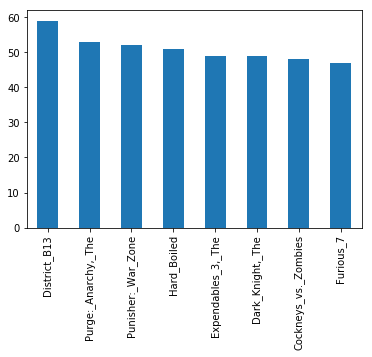

In [171]:
df.movie_title.value_counts().head(8).plot(kind='bar')

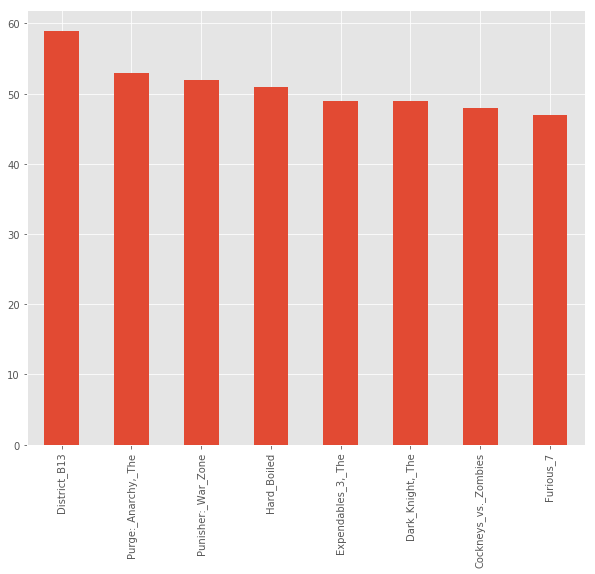

In [176]:
plt.style.use('ggplot')
df.movie_title.value_counts().head(8).plot(kind='bar', figsize=(10,8))
plt.savefig('every_gun_in_every_movie.svg')